In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df_Titanic = pd.read_csv('data/Train.csv')
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 1) Age, Sex, Survived
อายุและเพศเป็นปัจจัยที่เกี่ยวข้องกับการรอดชีวิตหรือไม่

In [3]:
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


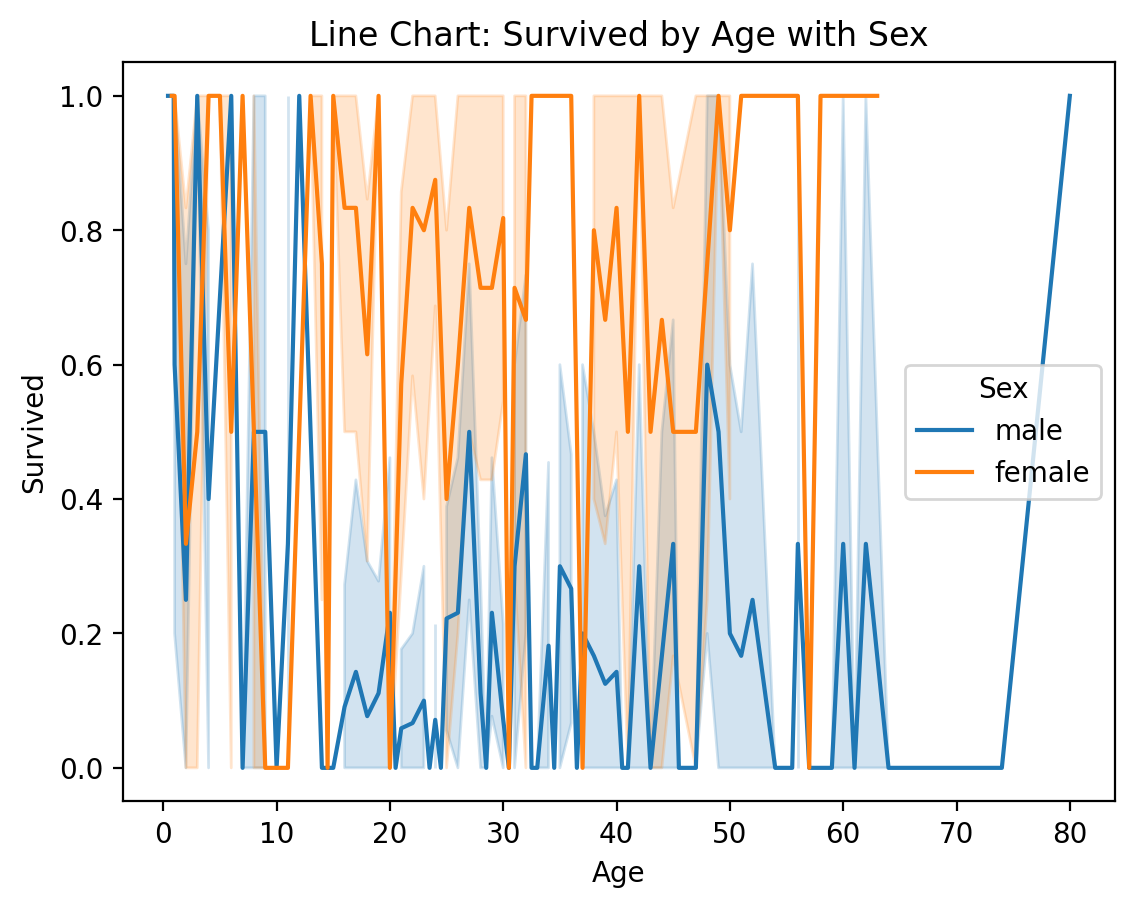

In [4]:
# Option 1 ไม่ค่อยดี ดูไม่รู้เรื่อง

# Choose the x-axis variable
x_axis = "Age"

# Create the line chart using seaborn
sns.lineplot(x=x_axis, y="Survived", hue="Sex", data=df_Titanic)

# Set the chart title and axis labels
plt.title("Line Chart: Survived by {} with Sex".format(x_axis))
plt.xlabel(x_axis)
plt.ylabel("Survived")

# Display the plot
plt.show()

In [5]:
# Step 2: Let's do it as table first

# 2.1: Create an "Age_Bin" column to categorize passengers into age groups (bins)
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_Titanic['Age_Bin'] = pd.cut(df_Titanic['Age'], bins=bins, labels=labels, right=False)
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [6]:
# 2.2: Group the dataframe by "Age_Bin" and "Sex" and calculate the percentage of passengers who survived
grouped1 = df_Titanic.groupby(['Age_Bin', 'Sex'])['Survived'].mean().reset_index()
grouped1.rename(columns={'Survived': '%Survived'}, inplace=True)
grouped1

C:\Users\Admin\AppData\Local\Temp\ipykernel_9868\1590292642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped1 = df_Titanic.groupby(['Age_Bin', 'Sex'])['Survived'].mean().reset_index()


,Age_Bin,Sex,%Survived
0,0-9,female,0.633333
1,0-9,male,0.593750
2,10-19,female,0.755556
3,10-19,male,0.122807
4,20-29,female,0.722222
5,20-29,male,0.168919
6,30-39,female,0.833333
7,30-39,male,0.214953
8,40-49,female,0.687500
9,40-49,male,0.210526


In [7]:
pivot_table1 = grouped1.pivot(index='Age_Bin', columns='Sex', values='%Survived')
pivot_table1 = pivot_table1.round(3)
pivot_table1

Sex,female,male
Age_Bin,,
0-9,0.633,0.594
10-19,0.756,0.123
20-29,0.722,0.169
30-39,0.833,0.215
40-49,0.688,0.211
50-59,0.889,0.133
60-69,1.000,0.133
70-79,NaN,0.143


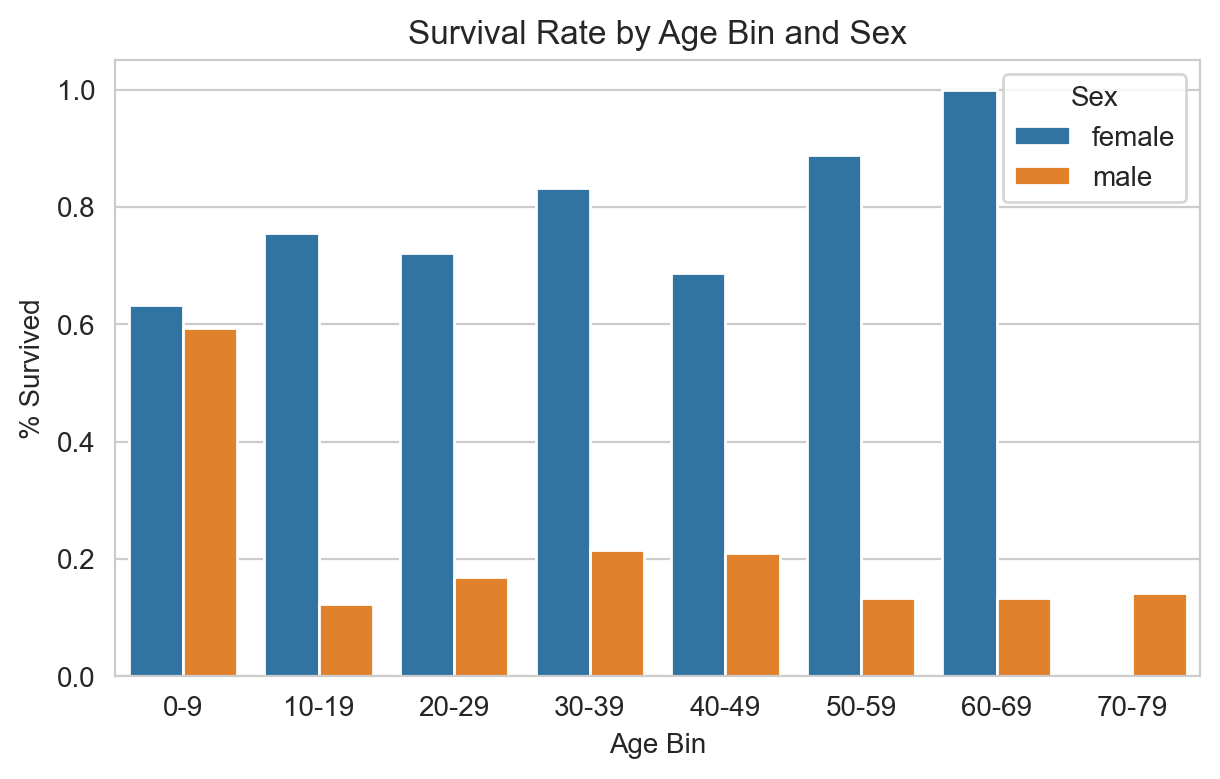

In [8]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(7, 4))
sns.barplot(data=grouped1, x='Age_Bin', y='%Survived', hue='Sex')
plt.title('Survival Rate by Age Bin and Sex')
plt.xlabel('Age Bin')
plt.ylabel('% Survived')
plt.legend(title='Sex')

# Show the plot
plt.show()

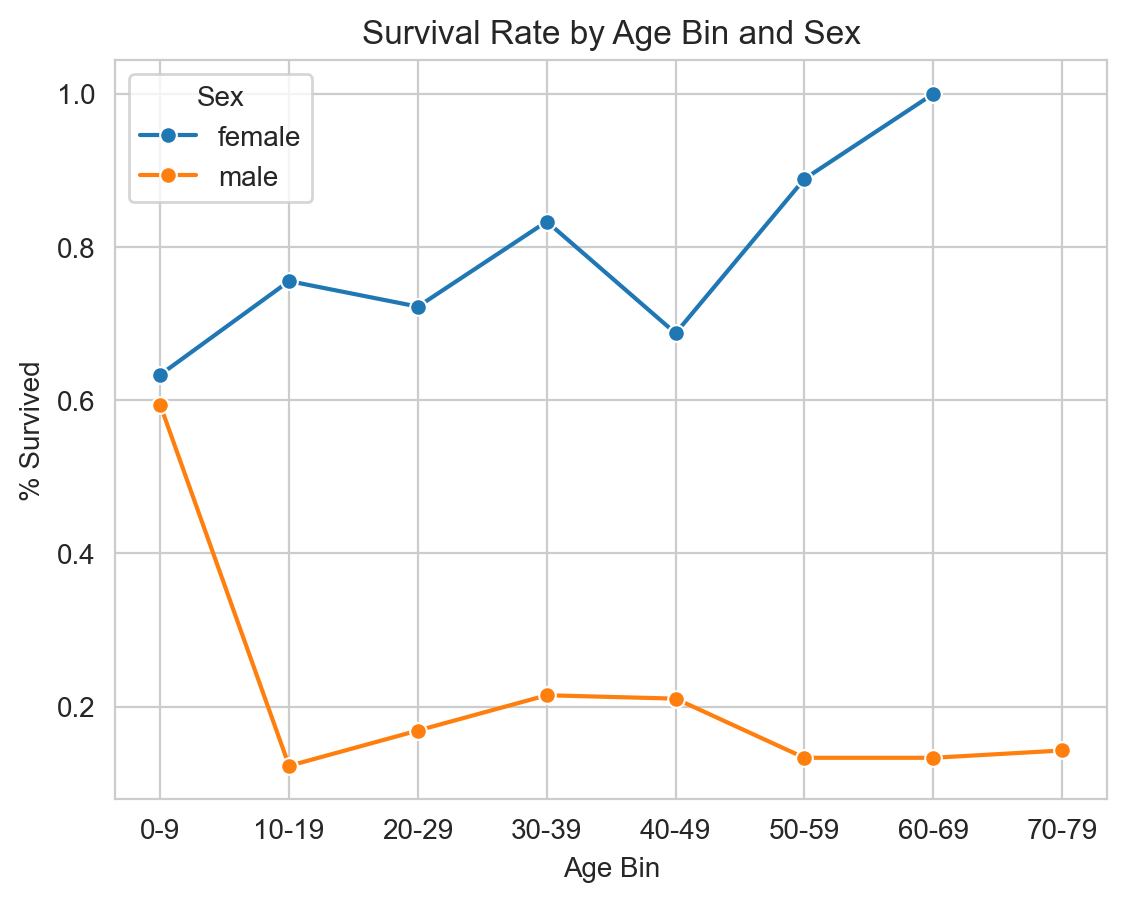

In [9]:
sns.lineplot(data=grouped1, x='Age_Bin', y='%Survived', hue='Sex', marker='o')
plt.title('Survival Rate by Age Bin and Sex')
plt.xlabel('Age Bin')
plt.ylabel('% Survived')
plt.legend(title='Sex')

# Show the plot
plt.show()

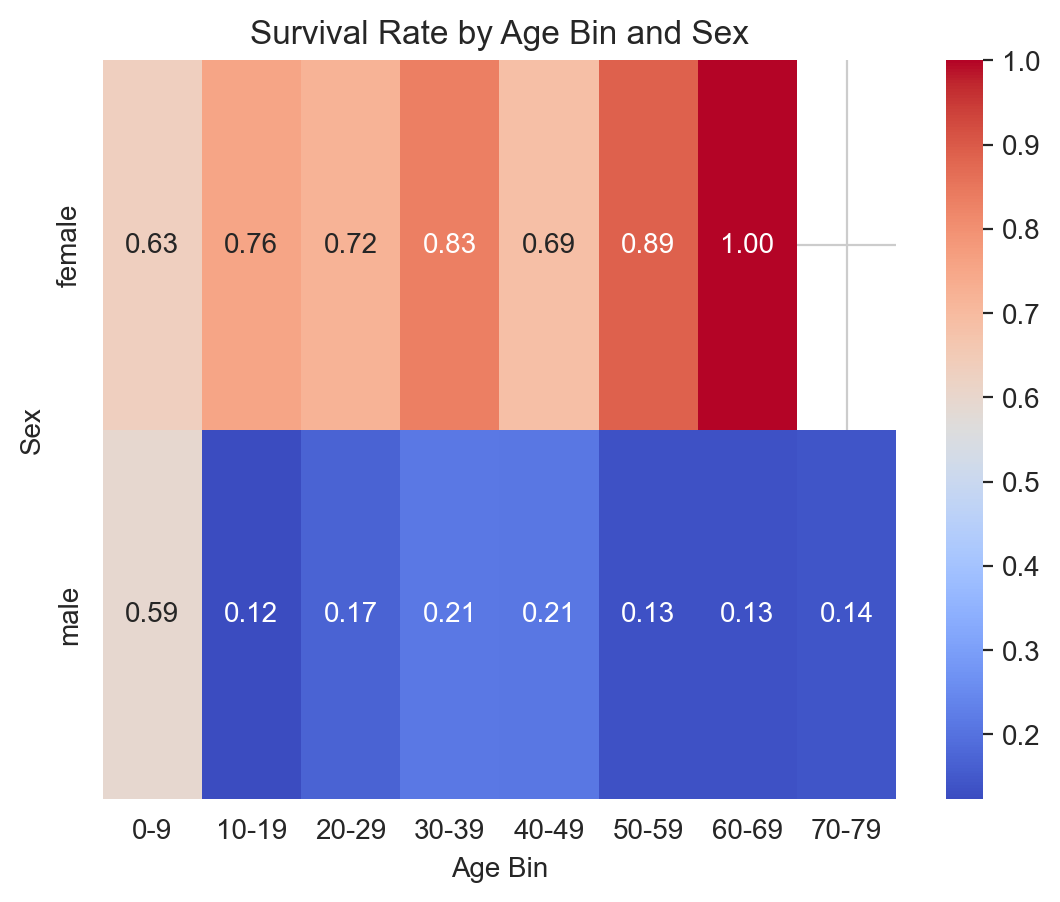

In [10]:
# Pivot the data for heatmap
heatmap_data = grouped1.pivot(index='Sex', columns='Age_Bin', values='%Survived')

# Plot heatmap
sns.heatmap(data=heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Survival Rate by Age Bin and Sex')
plt.xlabel('Age Bin')
plt.ylabel('Sex')

# Show the plot
plt.show()

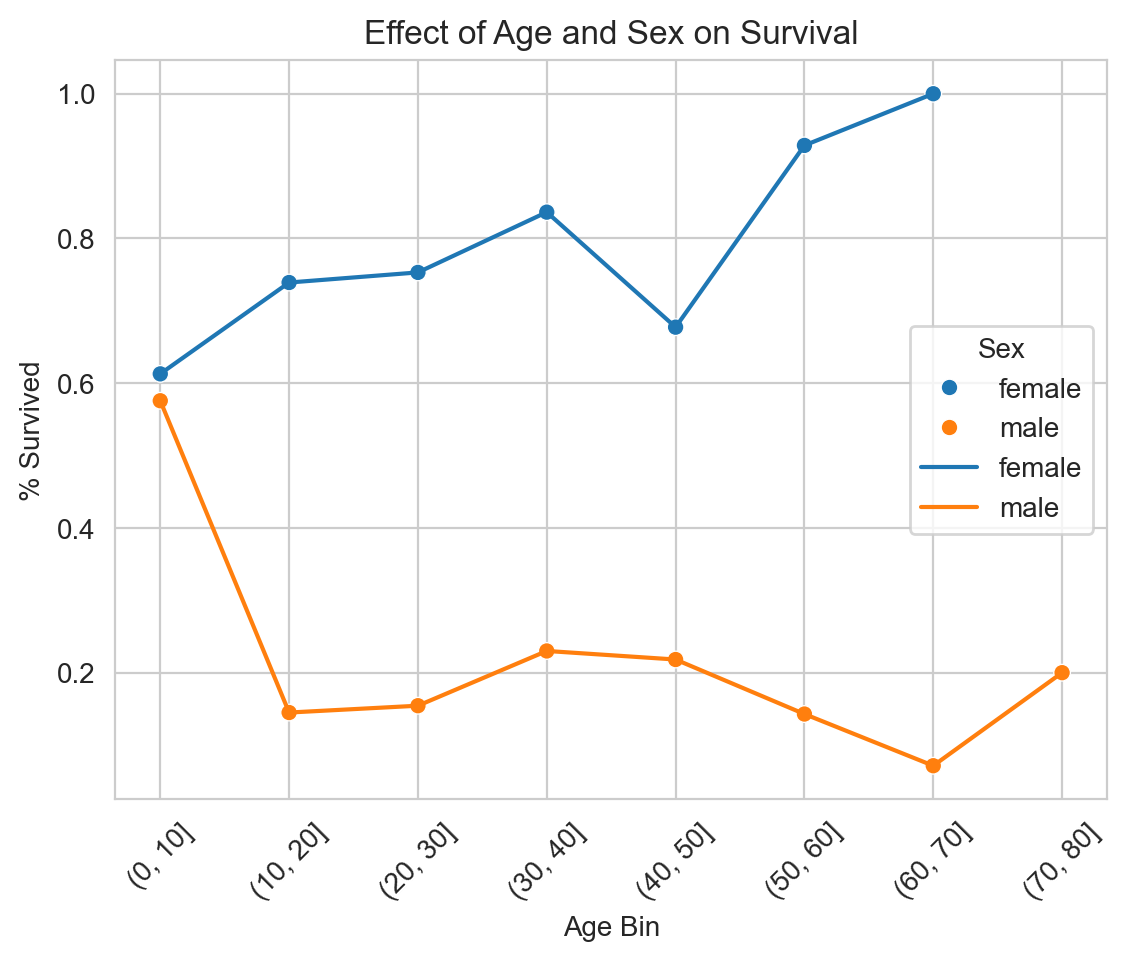

In [11]:
# option 2

# Remove null values from the 'Age' column
df_Titanic_no_null = df_Titanic.dropna(subset=['Age'])

# Define the bin intervals for Age
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Create a new column 'AgeBin' by binning the Age values
df_Titanic_no_null['AgeBin'] = pd.cut(df_Titanic_no_null['Age'], bins=age_bins)

# Convert AgeBin to string representation
df_Titanic_no_null['AgeBin'] = df_Titanic_no_null['AgeBin'].astype(str)

# Calculate the percentage of passengers who survived for each AgeBin and Sex
survival_percentage = df_Titanic_no_null.groupby(['AgeBin', 'Sex'])['Survived'].mean().reset_index()

# Create the scatter plot
sns.scatterplot(data=survival_percentage, x='AgeBin', y='Survived', hue='Sex')

# Create the line plot
sns.lineplot(data=survival_percentage, x='AgeBin', y='Survived', hue='Sex')

# Set labels and title
plt.xlabel('Age Bin')
plt.ylabel('% Survived')
plt.title('Effect of Age and Sex on Survival')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# 2) Age, Sex, Fare, Survived

- เพศในกลุ่มอายุที่มาจากเมืองเดียวกันที่ซื้อตั๋วในอัตราใกล้เคียงกันมีความสัมพันธ์ต่ออัตราการรอดชีวิตหรือไม่
- revised เพศ อายุ ราคาตั๋ว มีความสัมพันธ์ต่ออัตราการรอดชีวิตหรือไม่

In [12]:
df_Titanic = df_Titanic.drop(columns = ["Age_Bin"])

In [13]:
df_Titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [15]:
df_Titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df_Titanic_drop_null = df_Titanic.dropna(subset=["Age"])

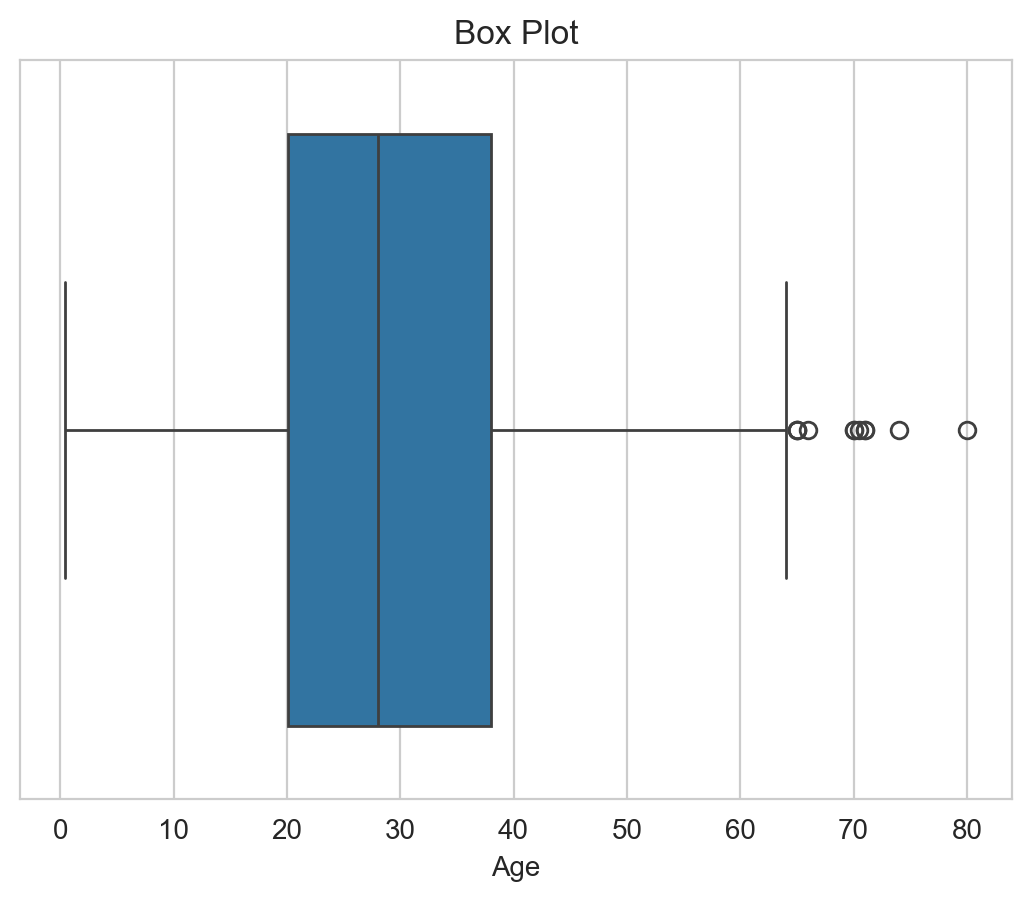

In [17]:
# Create the box plot using seaborn
sns.boxplot(data=df_Titanic_drop_null, x='Age')

# Set the chart title and axis labels
plt.title('Box Plot')
plt.xlabel('Age')

# Display the plot
plt.show()

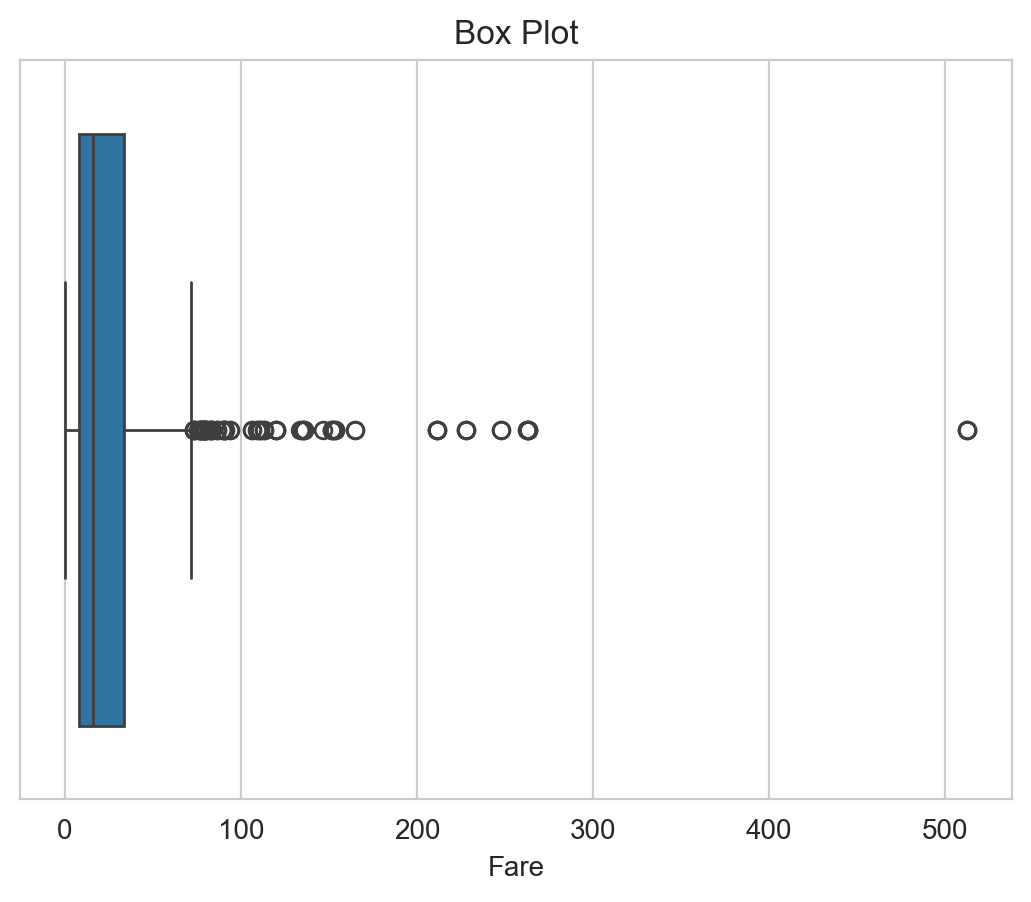

In [18]:
# Create the box plot using seaborn
sns.boxplot(data=df_Titanic_drop_null, x='Fare')

# Set the chart title and axis labels
plt.title('Box Plot')
plt.xlabel('Fare')

# Display the plot
plt.show()

In [19]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
fare_bins = [0, 25, 50, 100, 200, 300, 400, 500, 600]

# Create a new column 'AgeBin' and 'FareBin' by binning the Age and Fare values
df_Titanic_drop_null['AgeBin'] = pd.cut(df_Titanic_drop_null['Age'], bins=age_bins)
df_Titanic_drop_null['FareBin'] = pd.cut(df_Titanic_drop_null['Fare'], bins=fare_bins)

In [20]:
groupby_age_fare = df_Titanic_drop_null.groupby(["AgeBin", "FareBin"]).agg({"Survived":"mean"}).reset_index()
print(groupby_age_fare)

      AgeBin     FareBin  Survived
0    (0, 10]     (0, 25]  0.777778
1    (0, 10]    (25, 50]  0.441176
2    (0, 10]   (50, 100]  1.000000
3    (0, 10]  (100, 200]  0.500000
4    (0, 10]  (200, 300]       NaN
..       ...         ...       ...
59  (70, 80]  (100, 200]       NaN
60  (70, 80]  (200, 300]       NaN
61  (70, 80]  (300, 400]       NaN
62  (70, 80]  (400, 500]       NaN
63  (70, 80]  (500, 600]       NaN

[64 rows x 3 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9868\3955278367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_fare = df_Titanic_drop_null.groupby(["AgeBin", "FareBin"]).agg({"Survived":"mean"}).reset_index()


In [21]:
# Create the bar chart (Male)
sns.barplot(data=groupby_age_fare_sex, x='AgeBin' , y='Survived', hue= 'FareBin')

# Add labels and title
plt.xlabel('AgeBin' )
plt.ylabel('Survived')
plt.title('Survival Rate by Age Bin and Fare Bin')

# Display the chart
plt.show()

NameError: name 'groupby_age_fare_sex' is not defined

In [ ]:
groupby_age_fare_sex = df_Titanic_drop_null.groupby(["AgeBin", "FareBin", "Sex"]).agg({"Survived":"mean"}).reset_index()
print(groupby_age_fare_sex)

groupby_age_fare_male = groupby_age_fare_sex[groupby_age_fare_sex["Sex"] == "male"]
print(groupby_age_fare_male)

groupby_age_fare_female = groupby_age_fare_sex[groupby_age_fare_sex["Sex"] == "female"]
print(groupby_age_fare_female)

       AgeBin     FareBin     Sex  Survived
0     (0, 10]     (0, 25]  female  0.687500
1     (0, 10]     (0, 25]    male  0.909091
2     (0, 10]    (25, 50]  female  0.571429
3     (0, 10]    (25, 50]    male  0.350000
4     (0, 10]   (50, 100]  female       NaN
..        ...         ...     ...       ...
123  (70, 80]  (300, 400]    male       NaN
124  (70, 80]  (400, 500]  female       NaN
125  (70, 80]  (400, 500]    male       NaN
126  (70, 80]  (500, 600]  female       NaN
127  (70, 80]  (500, 600]    male       NaN

[128 rows x 4 columns]
       AgeBin     FareBin   Sex  Survived
1     (0, 10]     (0, 25]  male  0.909091
3     (0, 10]    (25, 50]  male  0.350000
5     (0, 10]   (50, 100]  male  1.000000
7     (0, 10]  (100, 200]  male  1.000000
9     (0, 10]  (200, 300]  male       NaN
..        ...         ...   ...       ...
119  (70, 80]  (100, 200]  male       NaN
121  (70, 80]  (200, 300]  male       NaN
123  (70, 80]  (300, 400]  male       NaN
125  (70, 80]  (400, 500]  m

C:\Users\Admin\AppData\Local\Temp\ipykernel_7188\2621667015.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age_fare_sex = df_Titanic_drop_null.groupby(["AgeBin", "FareBin", "Sex"]).agg({"Survived":"mean"}).reset_index()


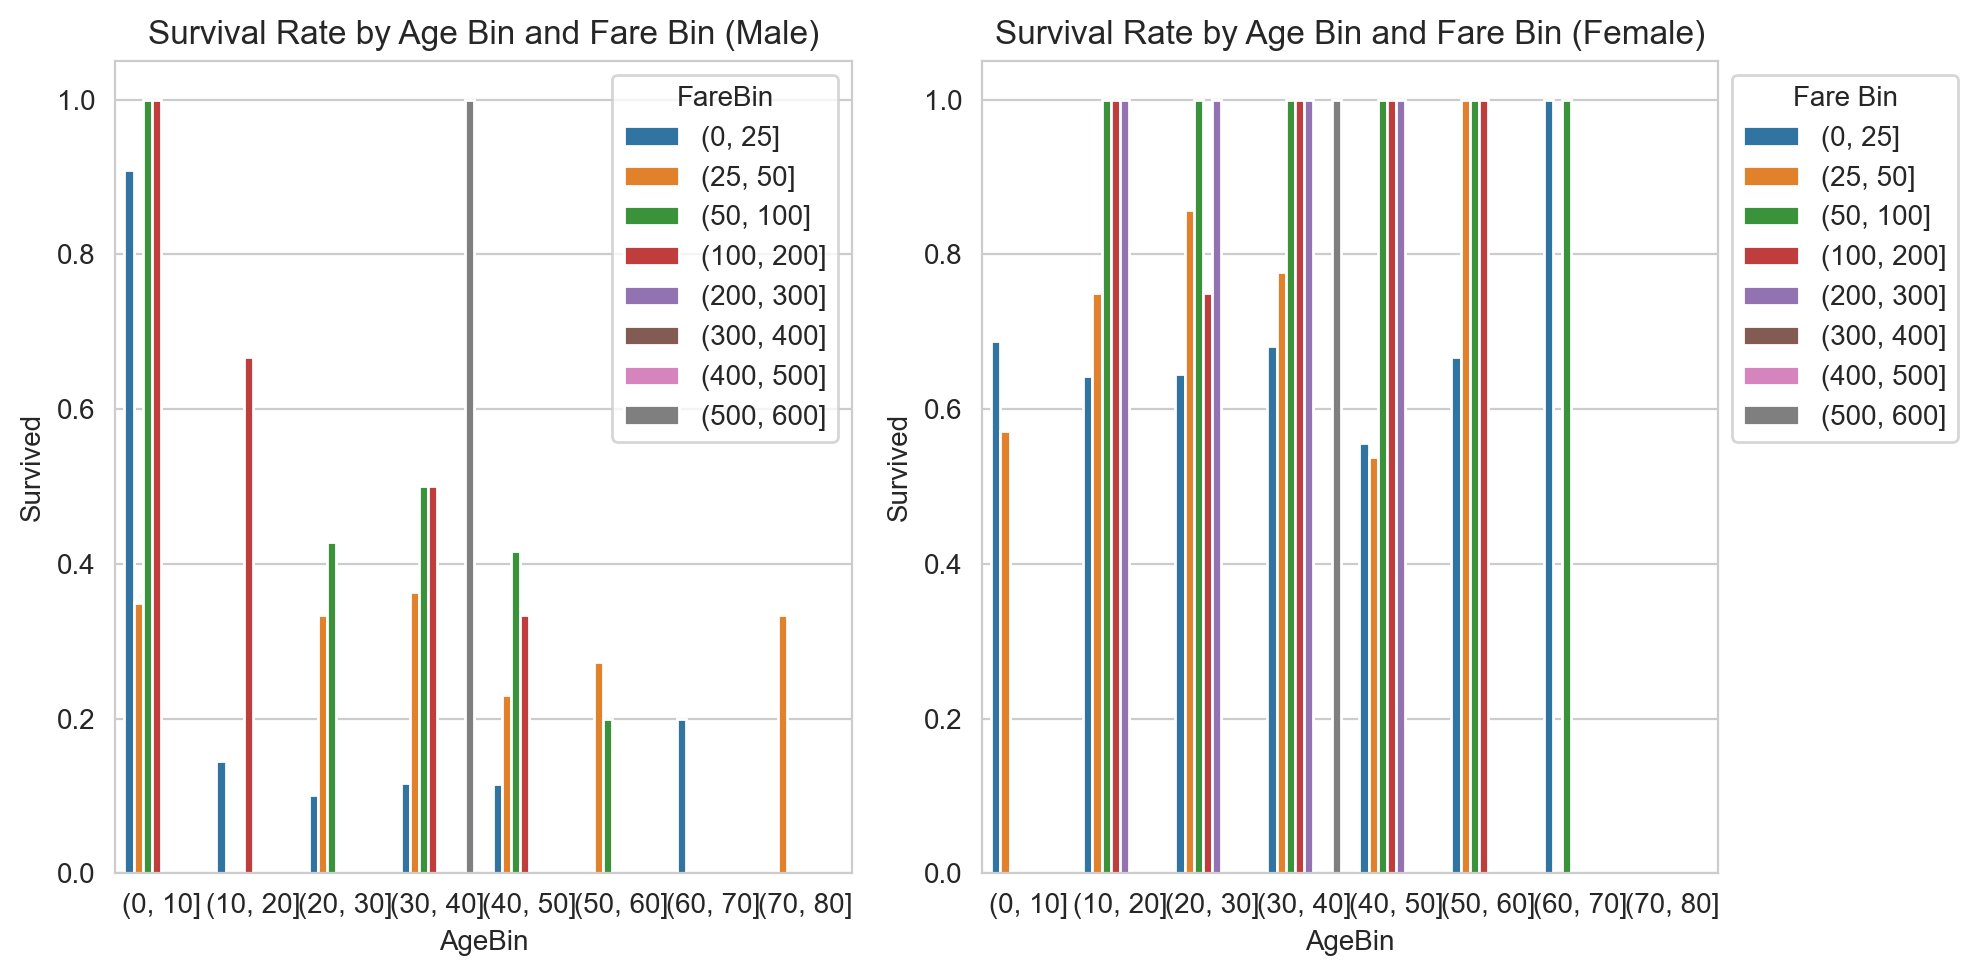

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# Create the bar chart (Male)
sns.barplot(data=groupby_age_fare_male, x='AgeBin' , y='Survived', hue= 'FareBin', ax=axes[0])
# Add labels and title
axes[0].set_xlabel('AgeBin' )
axes[0].set_ylabel('Survived')
axes[0].set_title('Survival Rate by Age Bin and Fare Bin (Male)')

# Create the bar chart (Female)
sns.barplot(data=groupby_age_fare_female, x='AgeBin' , y='Survived', hue= 'FareBin', ax=axes[1])
# Add labels and title
axes[1].set_xlabel('AgeBin' )
axes[1].set_ylabel('Survived')
axes[1].set_title('Survival Rate by Age Bin and Fare Bin (Female)')

# Move the legend outside the subplots
plt.legend(title="Fare Bin", bbox_to_anchor=(1,1))

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

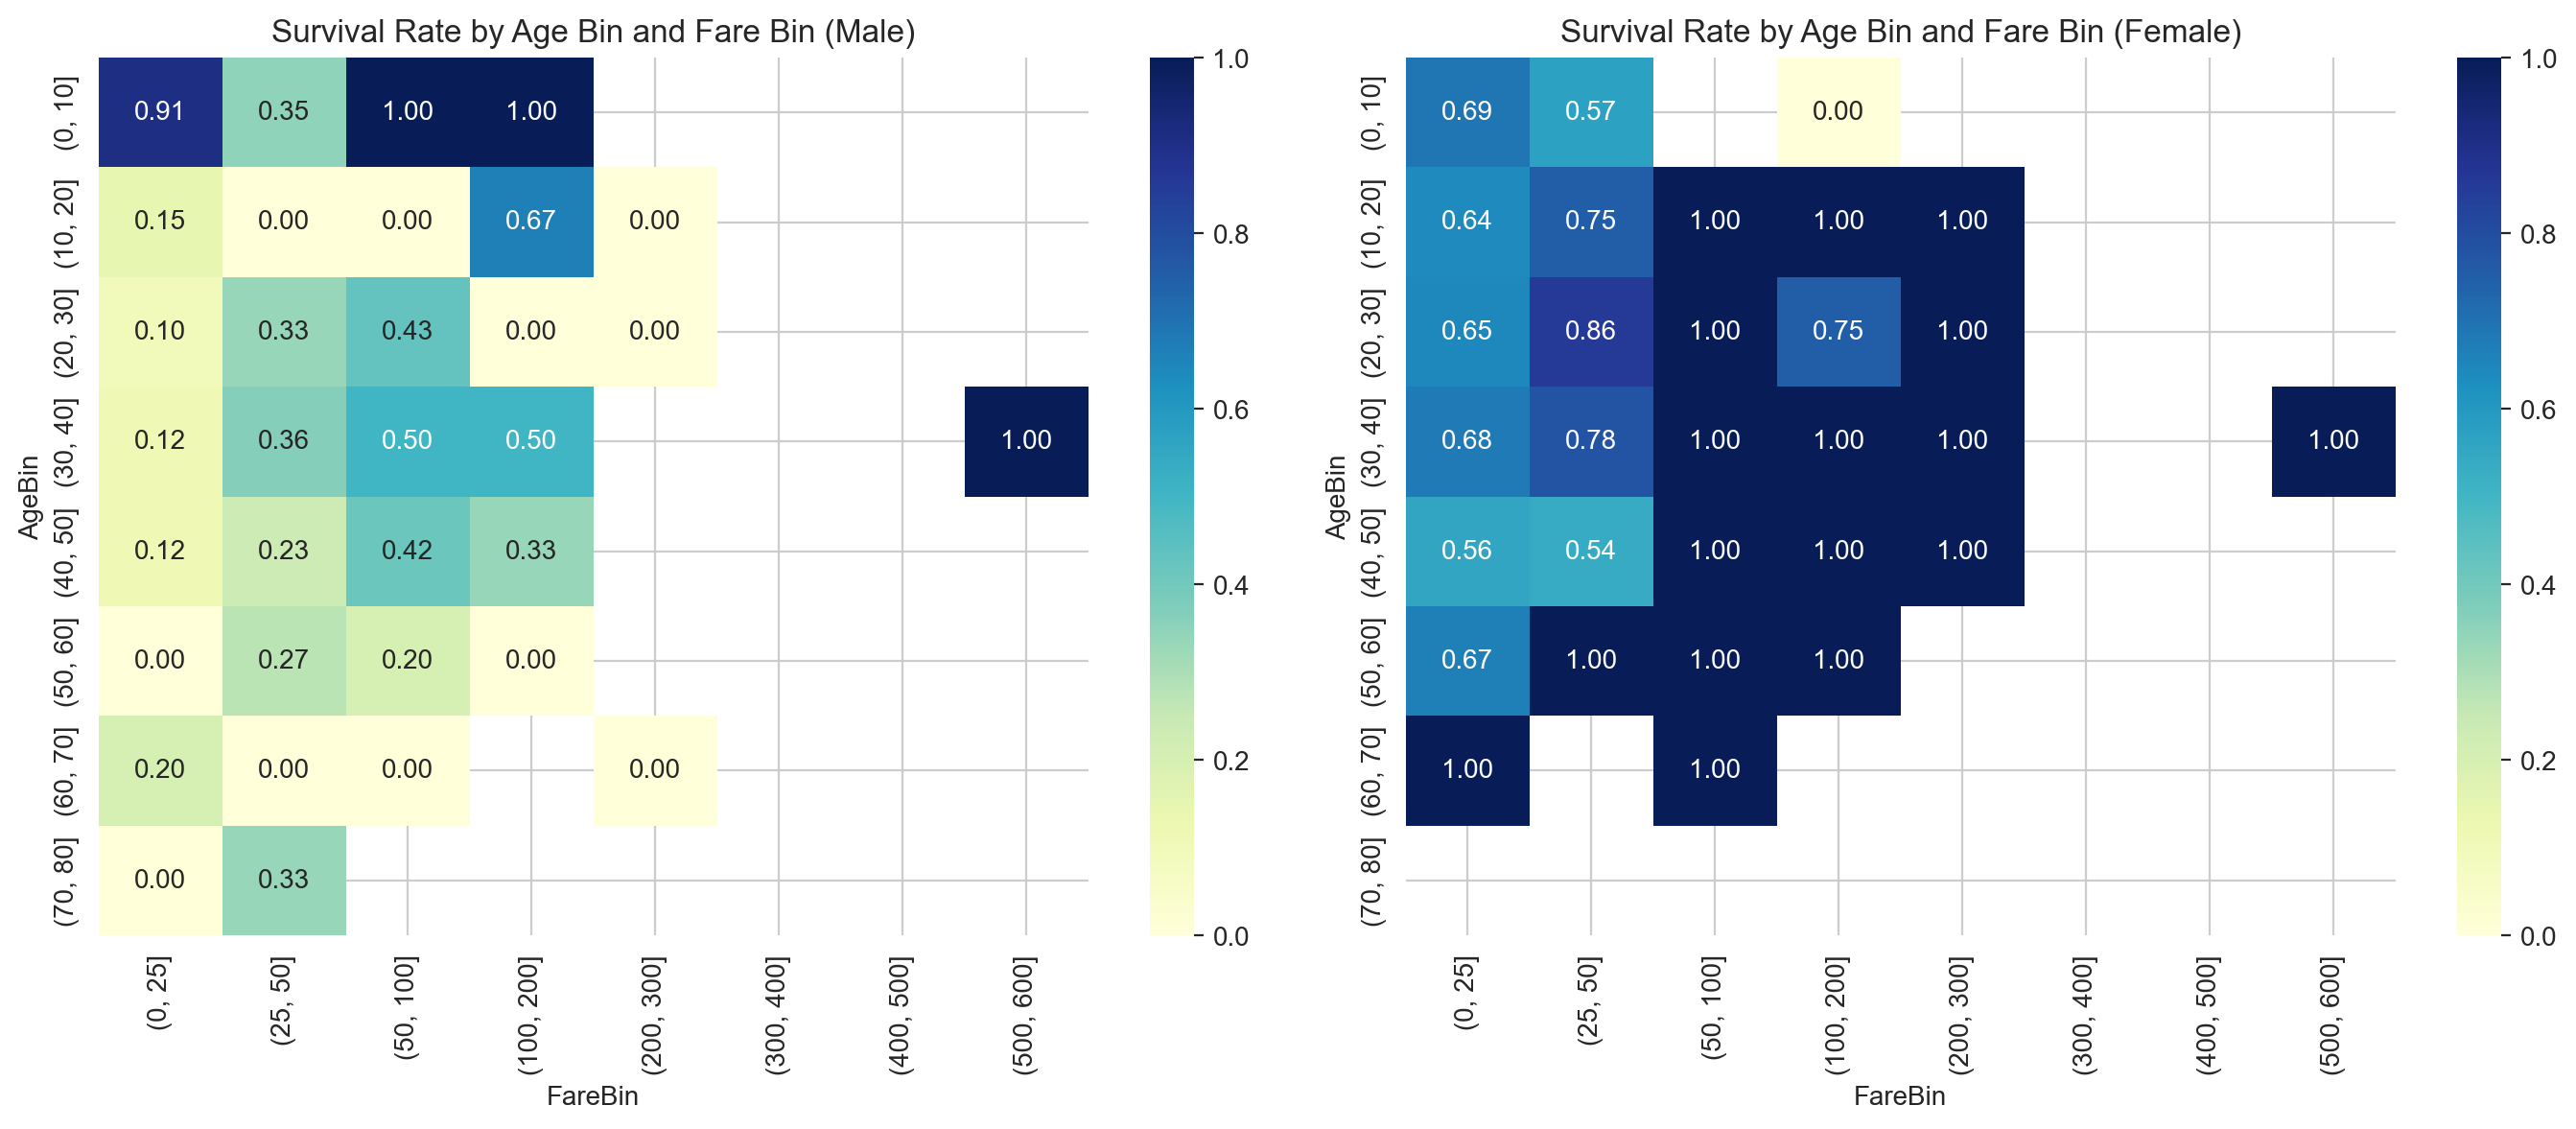

In [ ]:
pivot_age_fare_male = groupby_age_fare_male.pivot(index="AgeBin", columns="FareBin", values = "Survived")
pivot_age_fare_female = groupby_age_fare_female.pivot(index="AgeBin", columns="FareBin", values = "Survived")

# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Create the bar chart (Male)
sns.heatmap(data=pivot_age_fare_male, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[0])
# Add labels and title
axes[0].set_xlabel('FareBin')
axes[0].set_ylabel('AgeBin')
axes[0].set_title('Survival Rate by Age Bin and Fare Bin (Male)')

# Create the bar chart (Female)
sns.heatmap(data=pivot_age_fare_female, annot=True, fmt=".2f", cmap="YlGnBu", ax=axes[1])
# Add labels and title
axes[1].set_xlabel('FareBin' )
axes[1].set_ylabel('AgeBin')
axes[1].set_title('Survival Rate by Age Bin and Fare Bin (Female)')

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

# 3) Pclass, Sex, Survived
Pclass และ Sex มีผลต่อการรอดชีวิตหรือไม่

In [ ]:
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
for column in df_Titanic.columns:
    unique_values = df_Titanic[column].unique()
    num_unique_values = len(unique_values)

    print(f"Unique values in column '{column}':")

    if num_unique_values <= 10:
        print(unique_values)
    else:
        print(unique_values[:10])

    print()

Unique values in column 'Survived':
[0 1]

Unique values in column 'Pclass':
[3 1 2]

Unique values in column 'Name':
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']

Unique values in column 'Sex':
['male' 'female']

Unique values in column 'Age':
[22. 38. 26. 35. nan 54.  2. 27. 14.  4.]

Unique values in column 'SibSp':
[1 0 3 4 2 5 8]

Unique values in column 'Parch':
[0 1 2 5 3 4 6]

Unique values in column 'Ticket':
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']

Unique values in column 'Fare':
[ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708]

Unique values in column 'Cabin':
[nan 'C85' 

In [ ]:
# Step 2: Group-by function

# Calculate the percentage of passengers who survived for each combination of Pclass and Sex
grouped3 = df_Titanic.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()
grouped3.rename(columns={'Survived': '%Survived'}, inplace=True)
grouped3

,Pclass,Sex,%Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


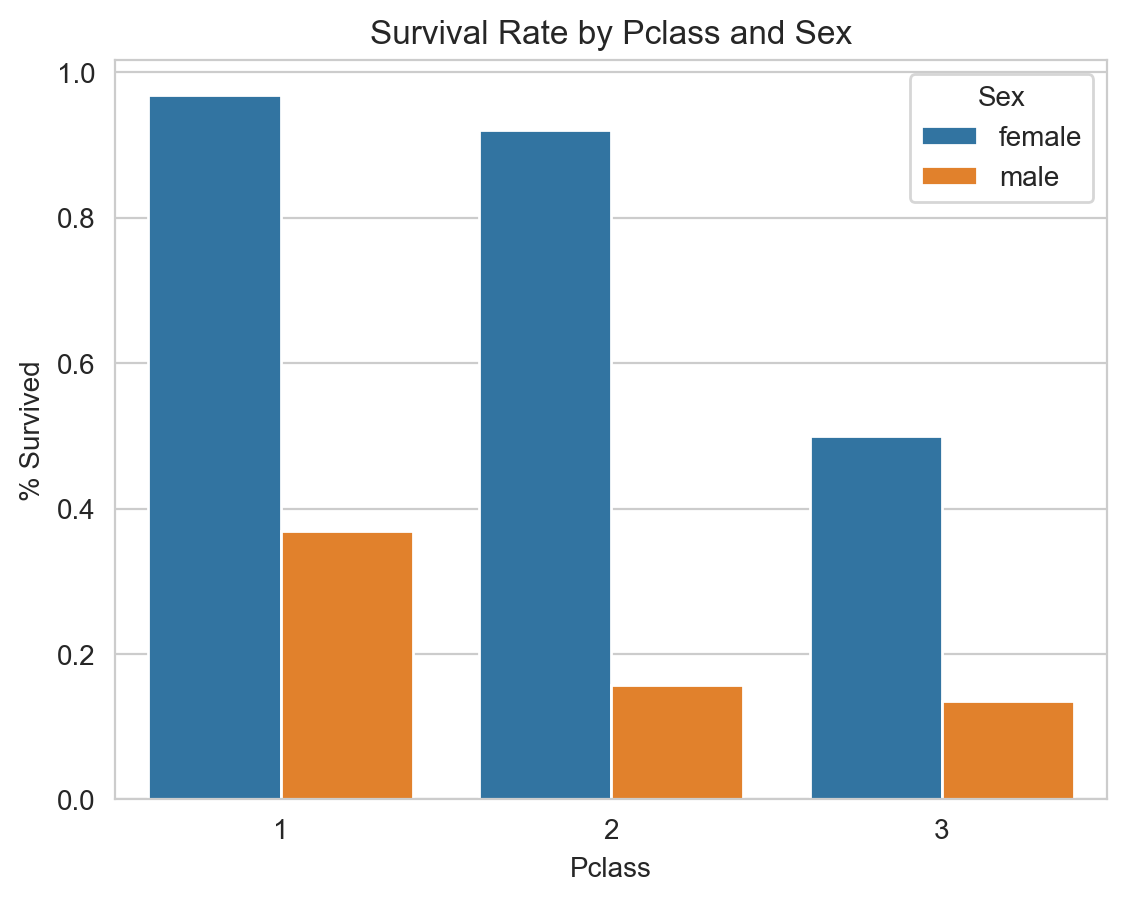

In [ ]:
# Create the bar plot
sns.barplot(data=grouped3, x="Pclass", y="%Survived", hue="Sex")
plt.title("Survival Rate by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("% Survived")
plt.legend(title="Sex")

# Show the plot
plt.show()

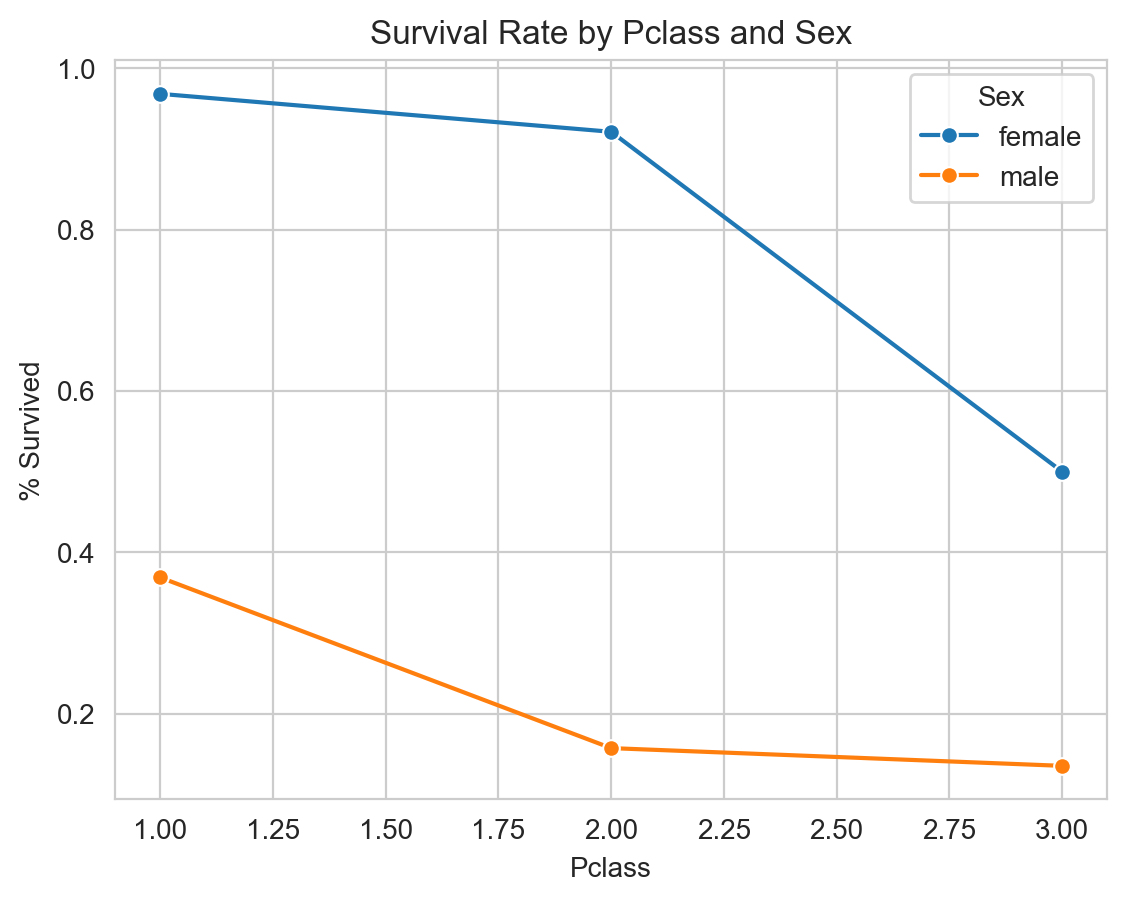

In [ ]:
# Create the line plot
sns.lineplot(data=grouped3, x="Pclass", y="%Survived", hue="Sex", marker="o")
plt.title("Survival Rate by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("% Survived")
plt.legend(title="Sex")

# Show the plot
plt.show()

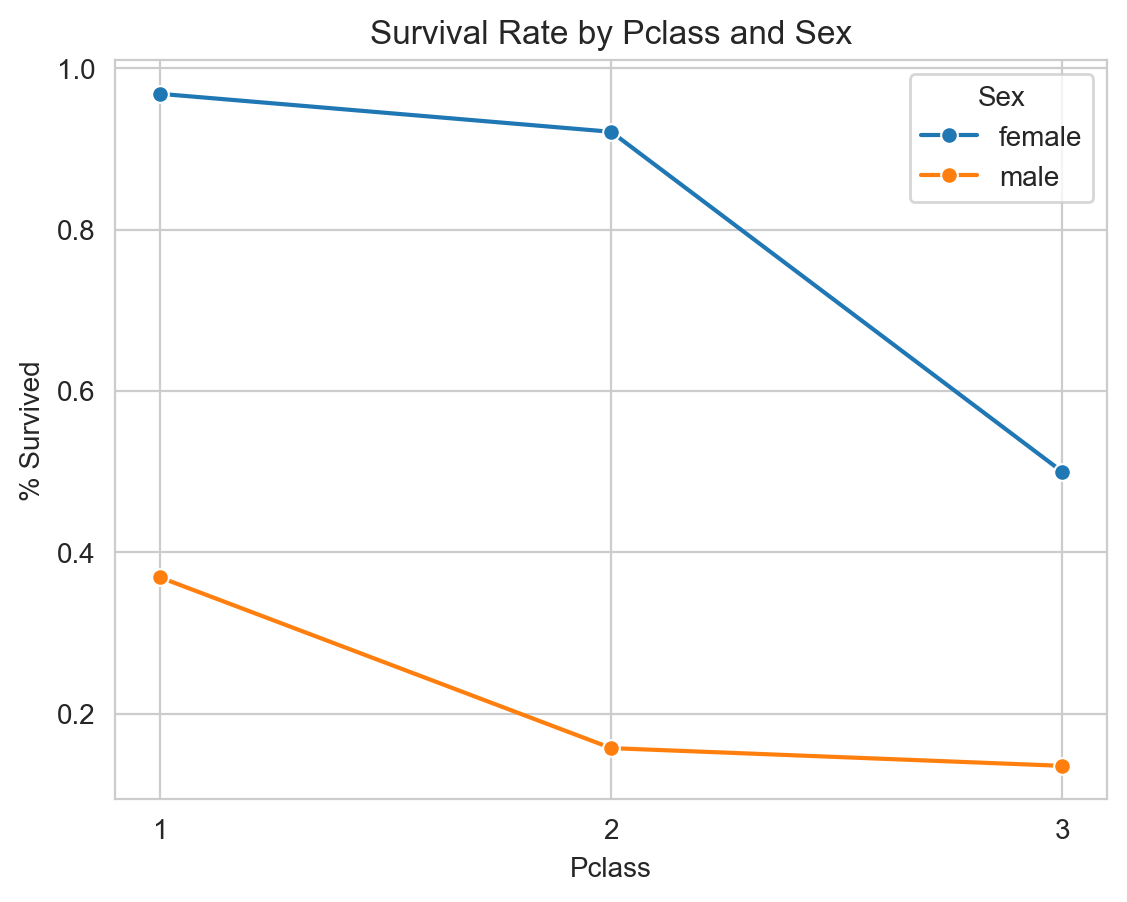

In [ ]:
# Create the line plot
sns.lineplot(data=grouped3, x="Pclass", y="%Survived", hue="Sex", marker="o")
plt.title("Survival Rate by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("% Survived")
plt.legend(title="Sex")

# Set the x-axis tick positions and labels
plt.xticks(range(1, 4))

# Show the plot
plt.show()

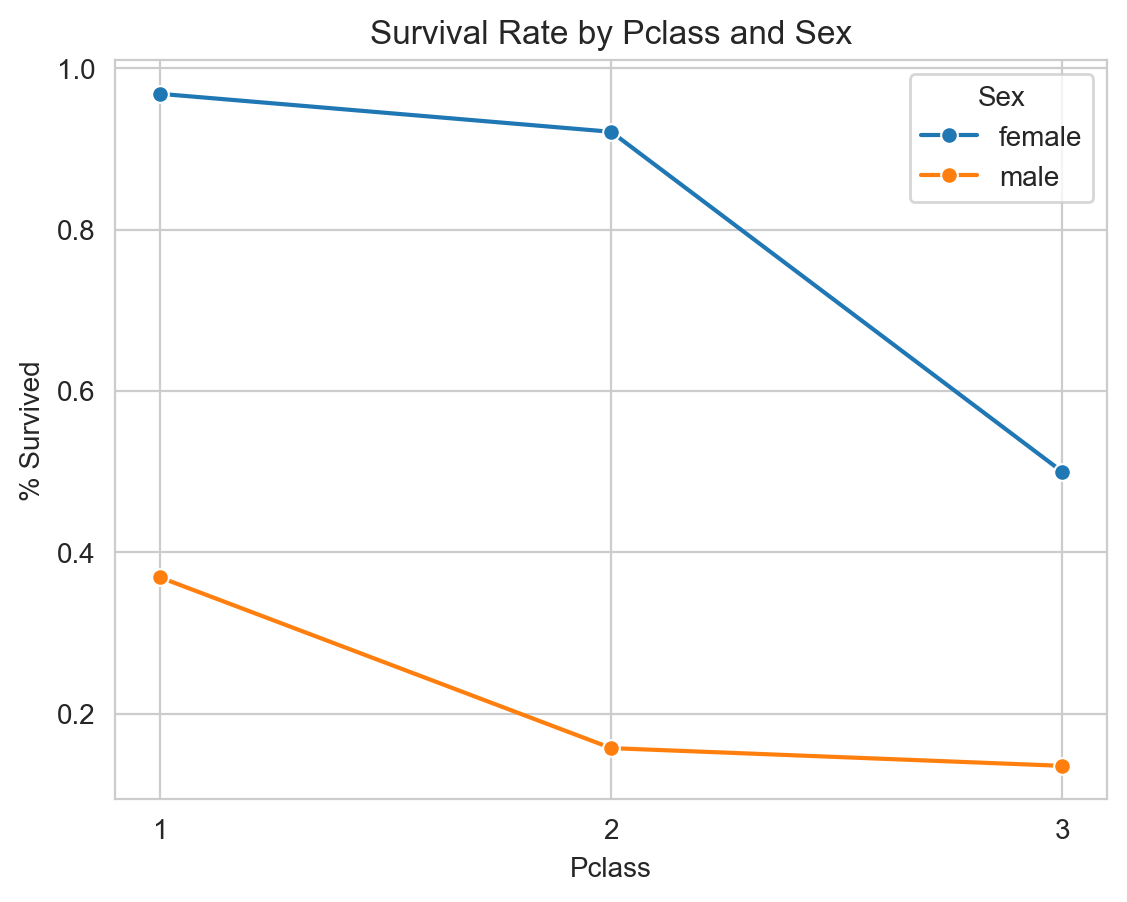

In [ ]:
# Create the line plot
sns.lineplot(data=grouped3, x="Pclass", y="%Survived", hue="Sex", marker="o")
plt.title("Survival Rate by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("% Survived")
plt.legend(title="Sex")

# Set the x-axis tick positions and labels
plt.xticks(range(1, 4))

# Show the plot
plt.show()

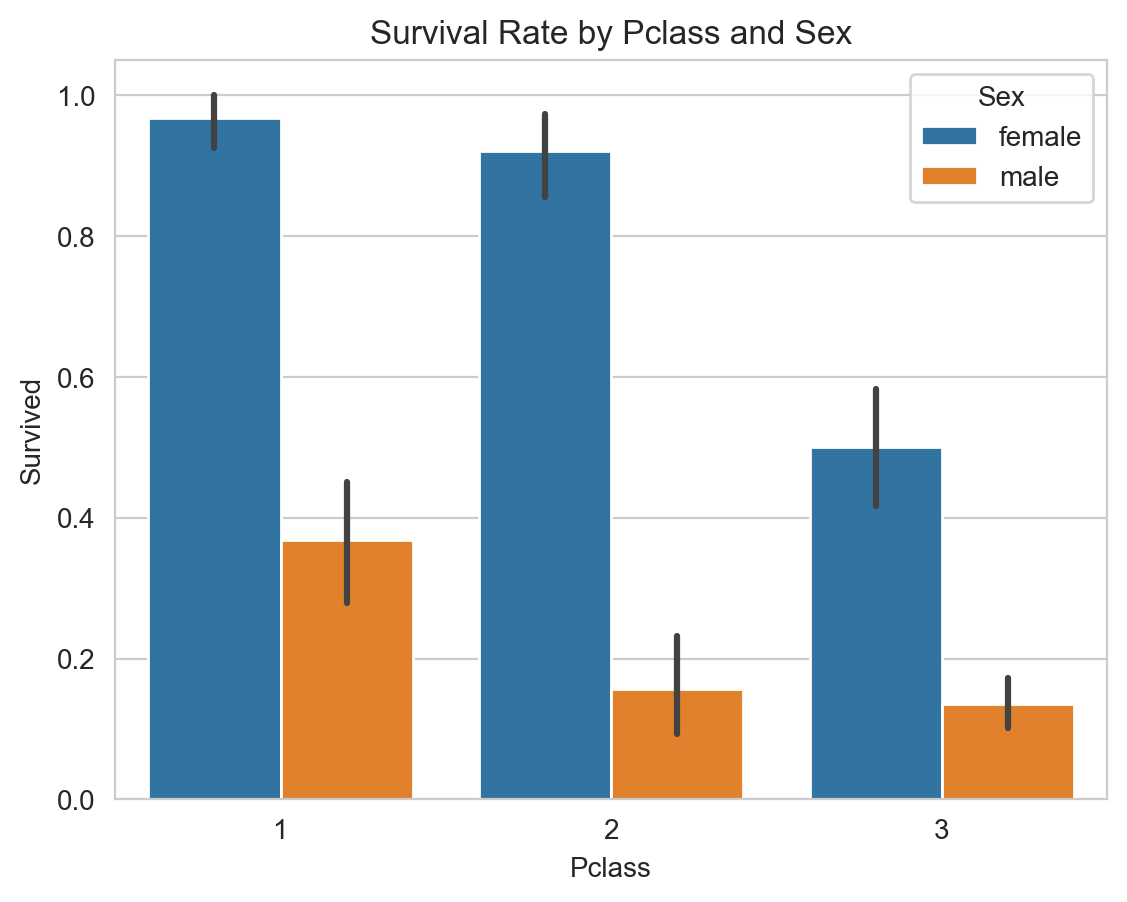

In [ ]:
# option 1

# Create the bar plot
sns.barplot(data=df_Titanic, x="Pclass", y="Survived", hue="Sex")
plt.title("Survival Rate by Pclass and Sex")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.legend(title="Sex")

# Show the plot
plt.show()

# 4) Pclass, Embarked, Survived

Pclass กับ Embarked มีผลต่อการรอดชีวิต หรือไม่

In [ ]:
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 2: Group-by function

# Calculate the percentage of passengers who survived for each combination of Pclass and Sex
grouped_Pclass_Embarked = df_Titanic.groupby(['Pclass', 'Embarked'])['Survived'].mean().reset_index()
grouped_Pclass_Embarked.rename(columns={'Survived': '%Survived'}, inplace=True)
grouped_Pclass_Embarked

,Pclass,Embarked,%Survived
0,1,C,0.694118
1,1,Q,0.500000
2,1,S,0.582677
3,2,C,0.529412
4,2,Q,0.666667
5,2,S,0.463415
6,3,C,0.378788
7,3,Q,0.375000
8,3,S,0.189802


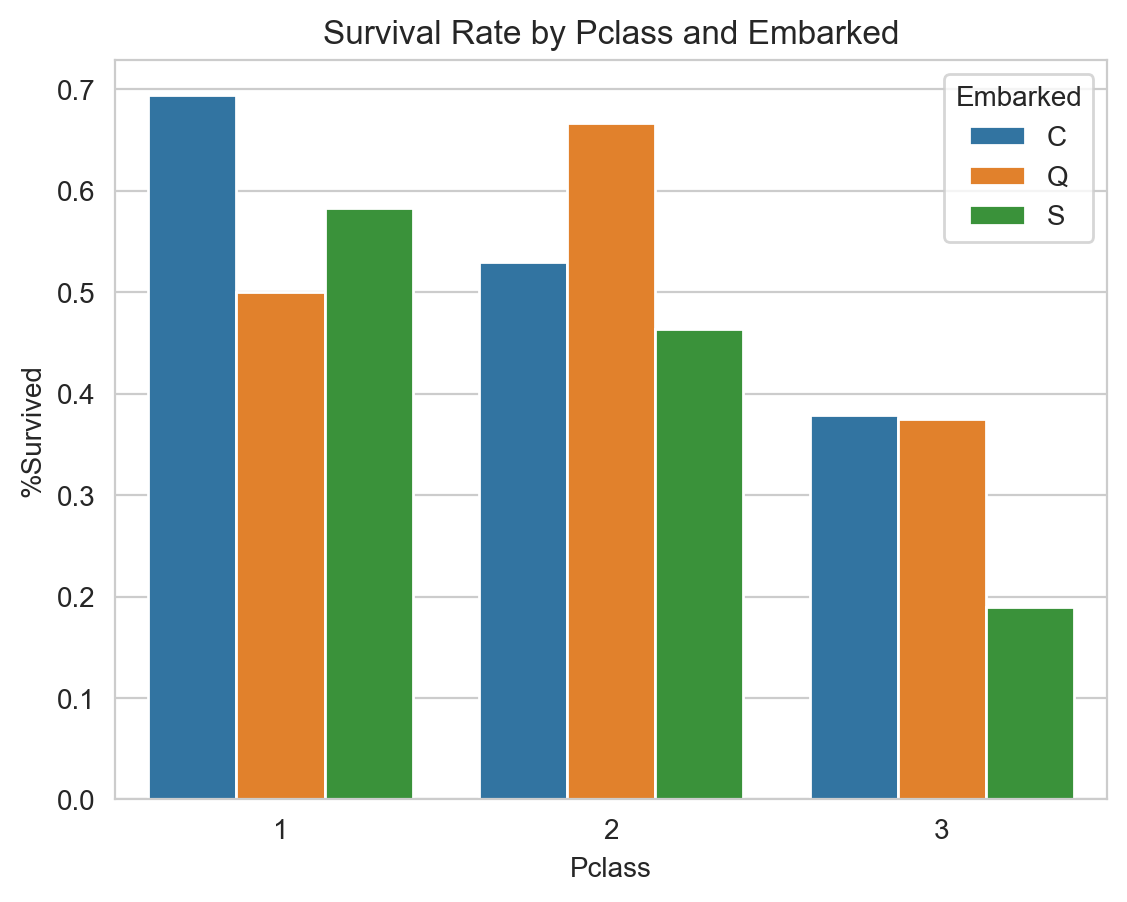

In [ ]:
# Create the bar plot
sns.barplot(data=grouped_Pclass_Embarked, x="Pclass", y="%Survived", hue="Embarked")
plt.title("Survival Rate by Pclass and Embarked")
plt.xlabel("Pclass")
plt.ylabel("%Survived")
plt.legend(title="Embarked")

# Show the plot
plt.show()

# 5) Pclass, Sex, Age, Survived
เพศ (Sex) อายุ (Age) และคลาส (Pclass) มีผลต่อการรอดชีวิต หรือไม่

In [ ]:
df_Titanic['Age_Bin'] = pd.cut(df_Titanic['Age'], bins=bins, labels=labels, right=False)
df_Titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [ ]:
# Create a new DataFrame with the required columns
grouped5 = df_Titanic[['Pclass', 'Sex', 'Age_Bin', 'Survived']].groupby(['Pclass', 'Sex', 'Age_Bin']).mean().reset_index()
grouped5.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7188\4096313375.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped5 = df_Titanic[['Pclass', 'Sex', 'Age_Bin', 'Survived']].groupby(['Pclass', 'Sex', 'Age_Bin']).mean().reset_index()


,Pclass,Sex,Age_Bin,Survived
0,1,female,0-9,0.000000
1,1,female,10-19,1.000000
2,1,female,20-29,0.937500
3,1,female,30-39,1.000000
4,1,female,40-49,1.000000
5,1,female,50-59,0.916667
6,1,female,60-69,1.000000
7,1,female,70-79,NaN
8,1,male,0-9,1.000000
9,1,male,10-19,0.400000


In [ ]:
# Filter the data for each Pclass separately
pclass_1 = grouped5[grouped5['Pclass'] == 1]
pclass_2 = grouped5[grouped5['Pclass'] == 2]
pclass_3 = grouped5[grouped5['Pclass'] == 3]

pclass_1.pivot(index='Age_Bin', columns='Sex', values='Survived')

Sex,female,male
Age_Bin,,
0-9,0.000000,1.000000
10-19,1.000000,0.400000
20-29,0.937500,0.500000
30-39,1.000000,0.521739
40-49,1.000000,0.375000
50-59,0.916667,0.266667
60-69,1.000000,0.100000
70-79,NaN,0.250000


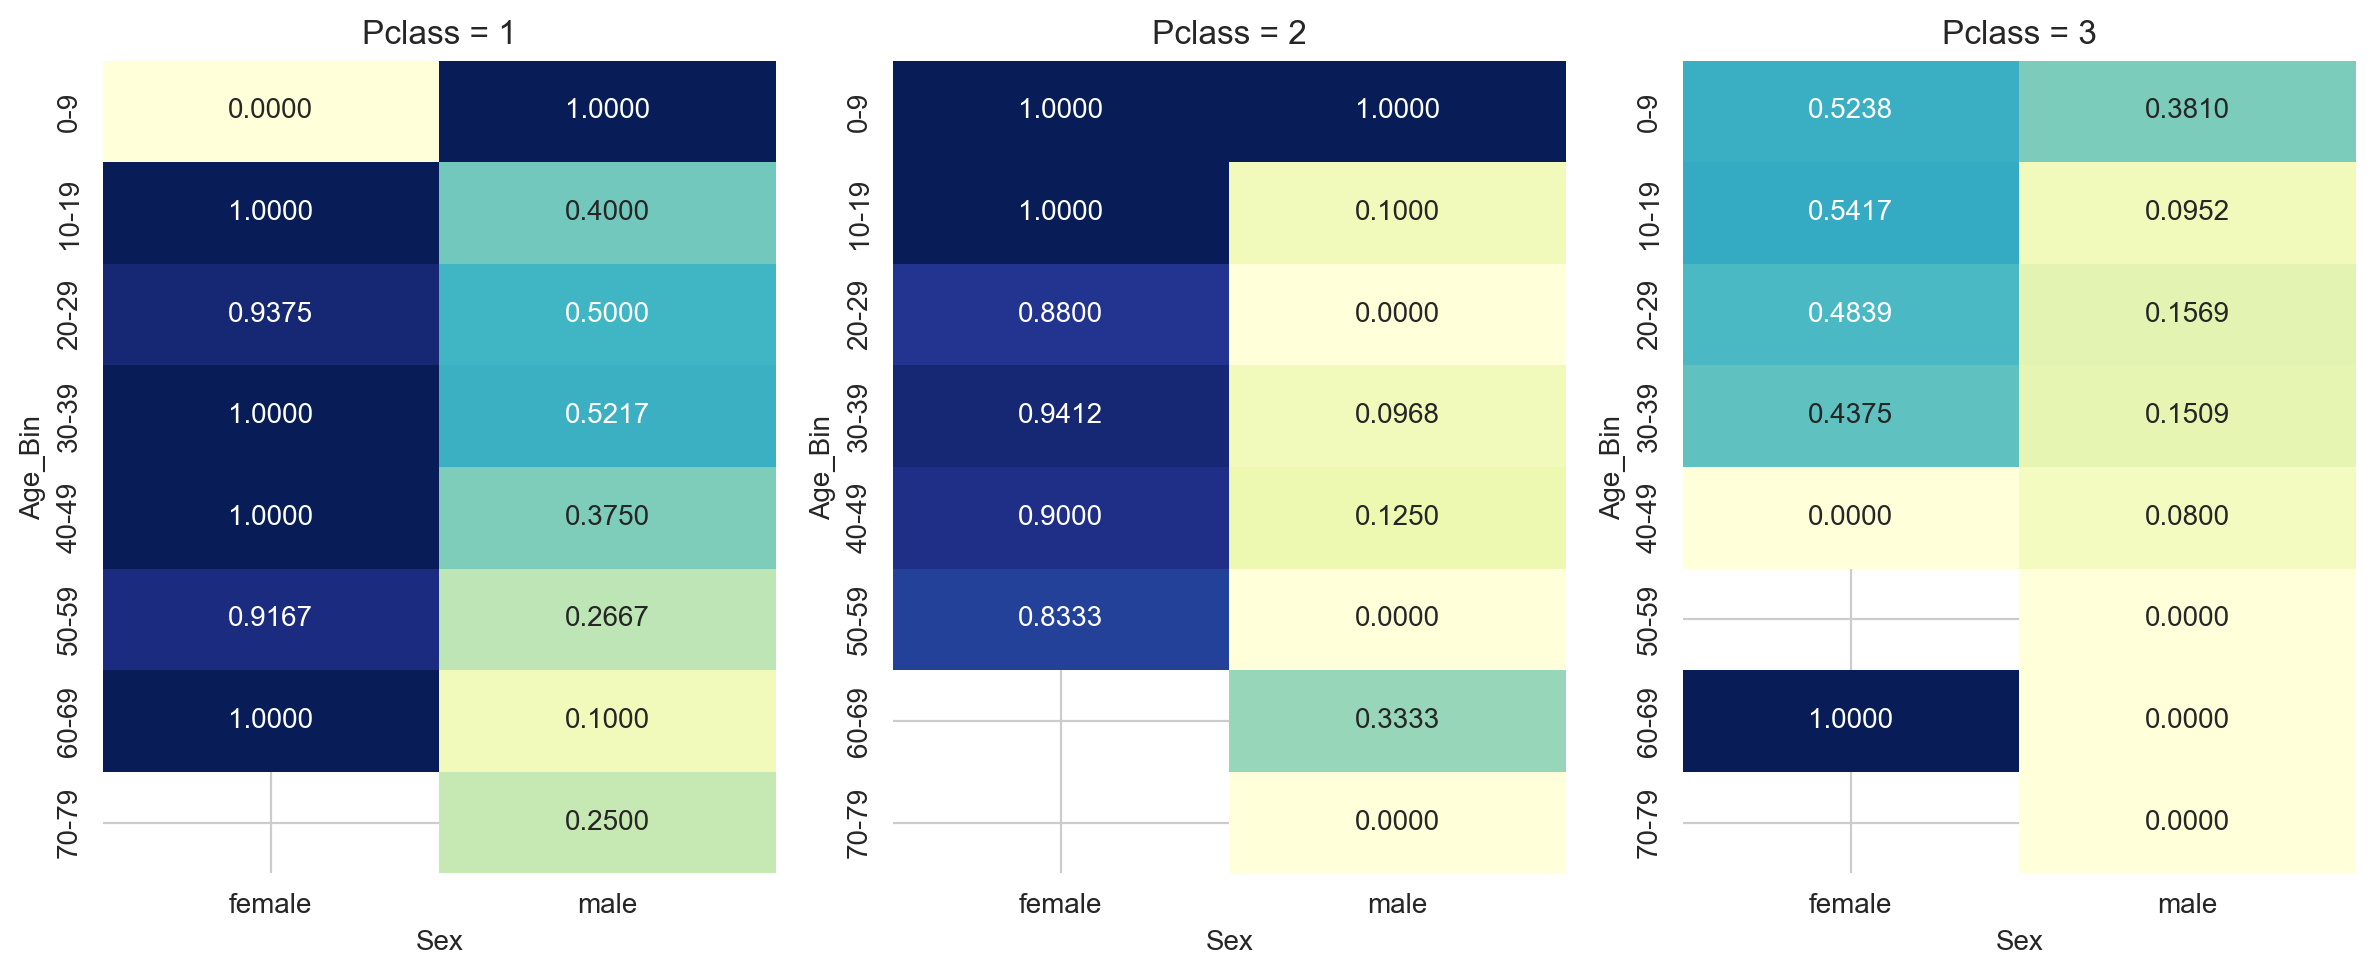

In [ ]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot for Pclass = 1
sns.heatmap(pclass_1.pivot(index='Age_Bin', columns='Sex', values='Survived'), cmap='YlGnBu', annot=True, fmt=".4f", cbar=False, ax=axes[0])
axes[0].set_title('Pclass = 1')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age_Bin')

# Plot for Pclass = 2
sns.heatmap(pclass_2.pivot(index='Age_Bin', columns='Sex', values='Survived'), cmap='YlGnBu', annot=True, fmt=".4f", cbar=False, ax=axes[1])
axes[1].set_title('Pclass = 2')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Age_Bin')

# Plot for Pclass = 3
sns.heatmap(pclass_3.pivot(index='Age_Bin', columns='Sex', values='Survived'), cmap='YlGnBu', annot=True, fmt=".4f", cbar=False, ax=axes[2])
axes[2].set_title('Pclass = 3')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Age_Bin')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convert the Age_Bin column to string format
grouped5['Age_Bin'] = grouped5['Age_Bin'].astype(str)

# Filter the data for each Pclass separately
pclass_1 = grouped5[grouped5['Pclass'] == 1]
pclass_2 = grouped5[grouped5['Pclass'] == 2]
pclass_3 = grouped5[grouped5['Pclass'] == 3]

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Pclass = 1", "Pclass = 2", "Pclass = 3"))

# Add heatmap traces for Pclass = 1
trace1 = go.Heatmap(
    x=pclass_1['Sex'],
    y=pclass_1['Age_Bin'],
    z=pclass_1['Survived'],
    colorscale='YlGnBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title='%Survived')
)
fig.add_trace(trace1, row=1, col=1)

# Add heatmap traces for Pclass = 2
trace2 = go.Heatmap(
    x=pclass_2['Sex'],
    y=pclass_2['Age_Bin'],
    z=pclass_2['Survived'],
    colorscale='YlGnBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title='%Survived')
)
fig.add_trace(trace2, row=1, col=2)

# Add heatmap traces for Pclass = 3
trace3 = go.Heatmap(
    x=pclass_3['Sex'],
    y=pclass_3['Age_Bin'],
    z=pclass_3['Survived'],
    colorscale='YlGnBu',
    zmin=0,
    zmax=1,
    colorbar=dict(title='%Survived')
)
fig.add_trace(trace3, row=1, col=3)

# Update layout
fig.update_layout(
    title='Survival Rate by Pclass, Sex, and Age',
    xaxis=dict(title='Sex'),
    yaxis=dict(title='Age_Bin'),
    height=400,
    width=1000,
)

# Show the plot
fig.show()


# 6) FamilySize, Survived
คนที่มีพี่น้องหรือไม่มี ส่งผลต่อการรอดชีวิตไหม

In [ ]:
# Calculate family size by summing SibSp and Parch and adding 1 for the passenger
df_Titanic['FamilySize'] = df_Titanic['SibSp'] + df_Titanic['Parch'] + 1

# Group the data by family size and calculate the survival rate
grouped = df_Titanic.groupby('FamilySize')['Survived'].mean().reset_index()
grouped

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_7188\1685540946.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




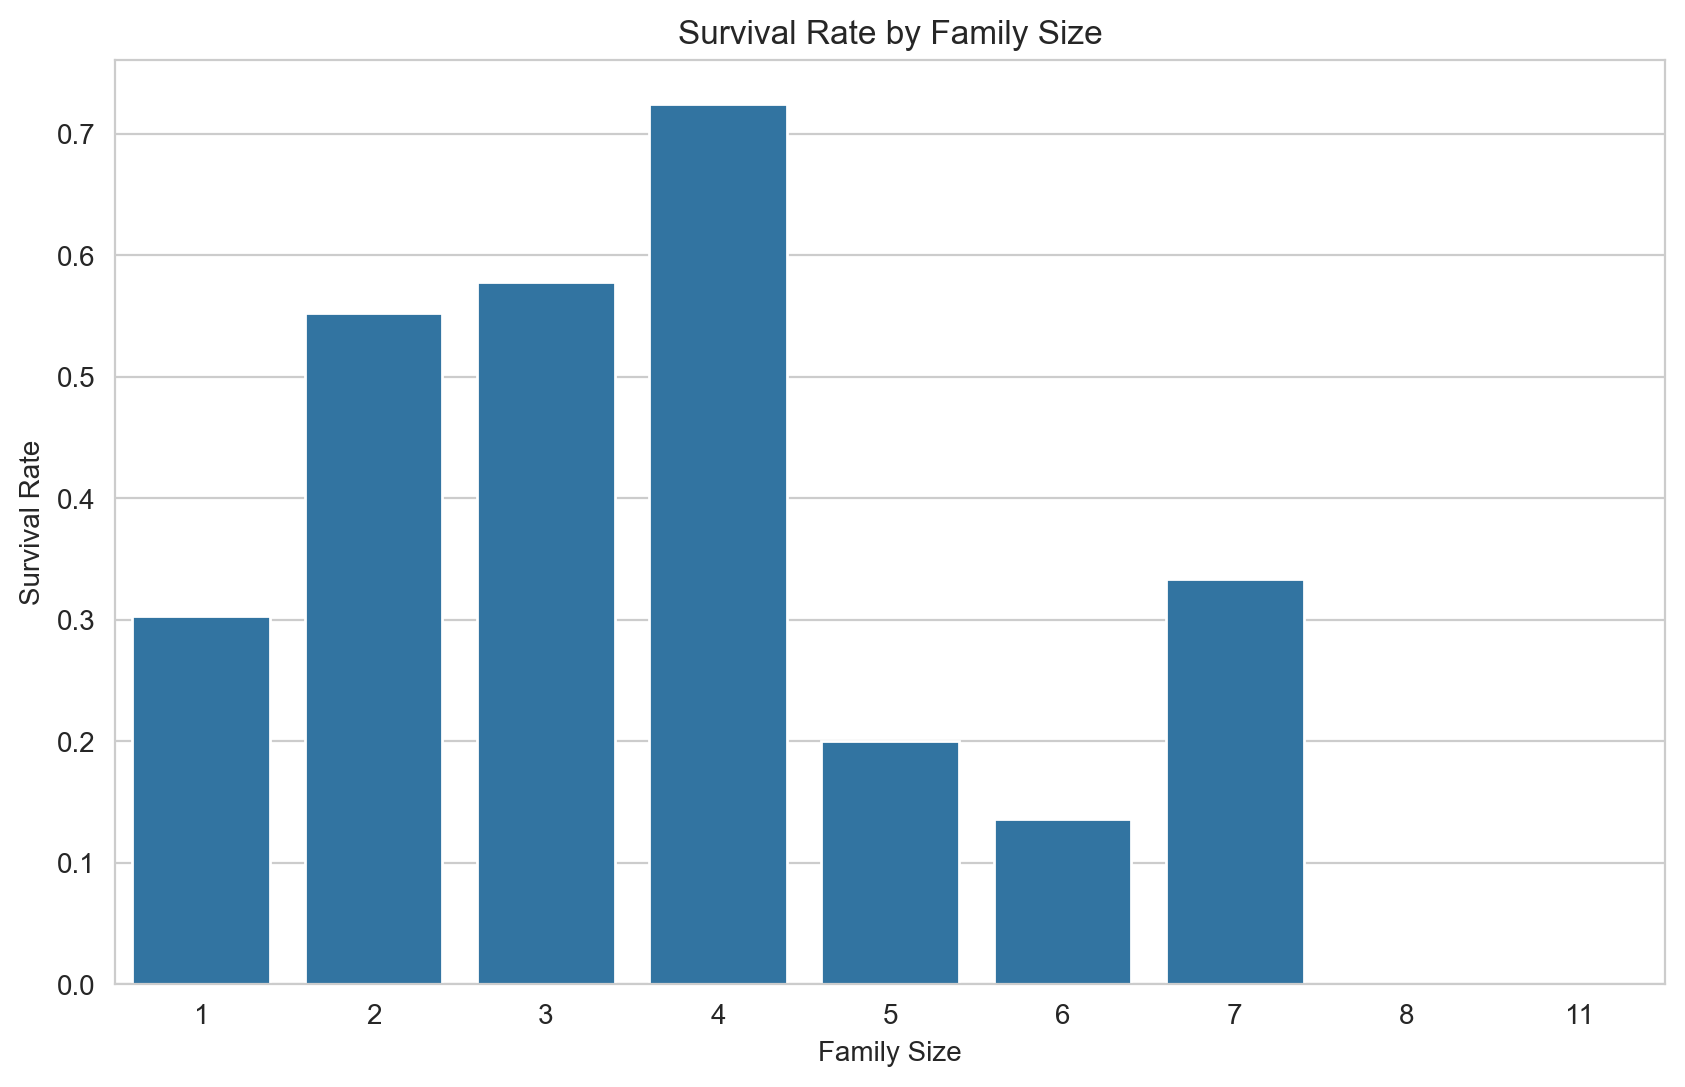

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='FamilySize', y='Survived', ci=None)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()

# 7) FamilySize, Fare, Survived
จำนวนคนในครอบครัวกับราคาตั๋วมีผลต่อการรอดชีวิตหรือไม่

In [ ]:
grouped7 = df_Titanic.groupby(["FamilySize", "Survived"])["Fare"].mean().reset_index()
grouped7

,FamilySize,Survived,Fare
0,1,0,14.127258
1,1,1,37.568891
2,2,0,34.095315
3,2,1,62.675191
4,3,0,35.662307
5,3,1,42.629729
6,4,0,56.425525
7,4,1,54.269838
8,5,0,26.972233
9,5,1,182.583333


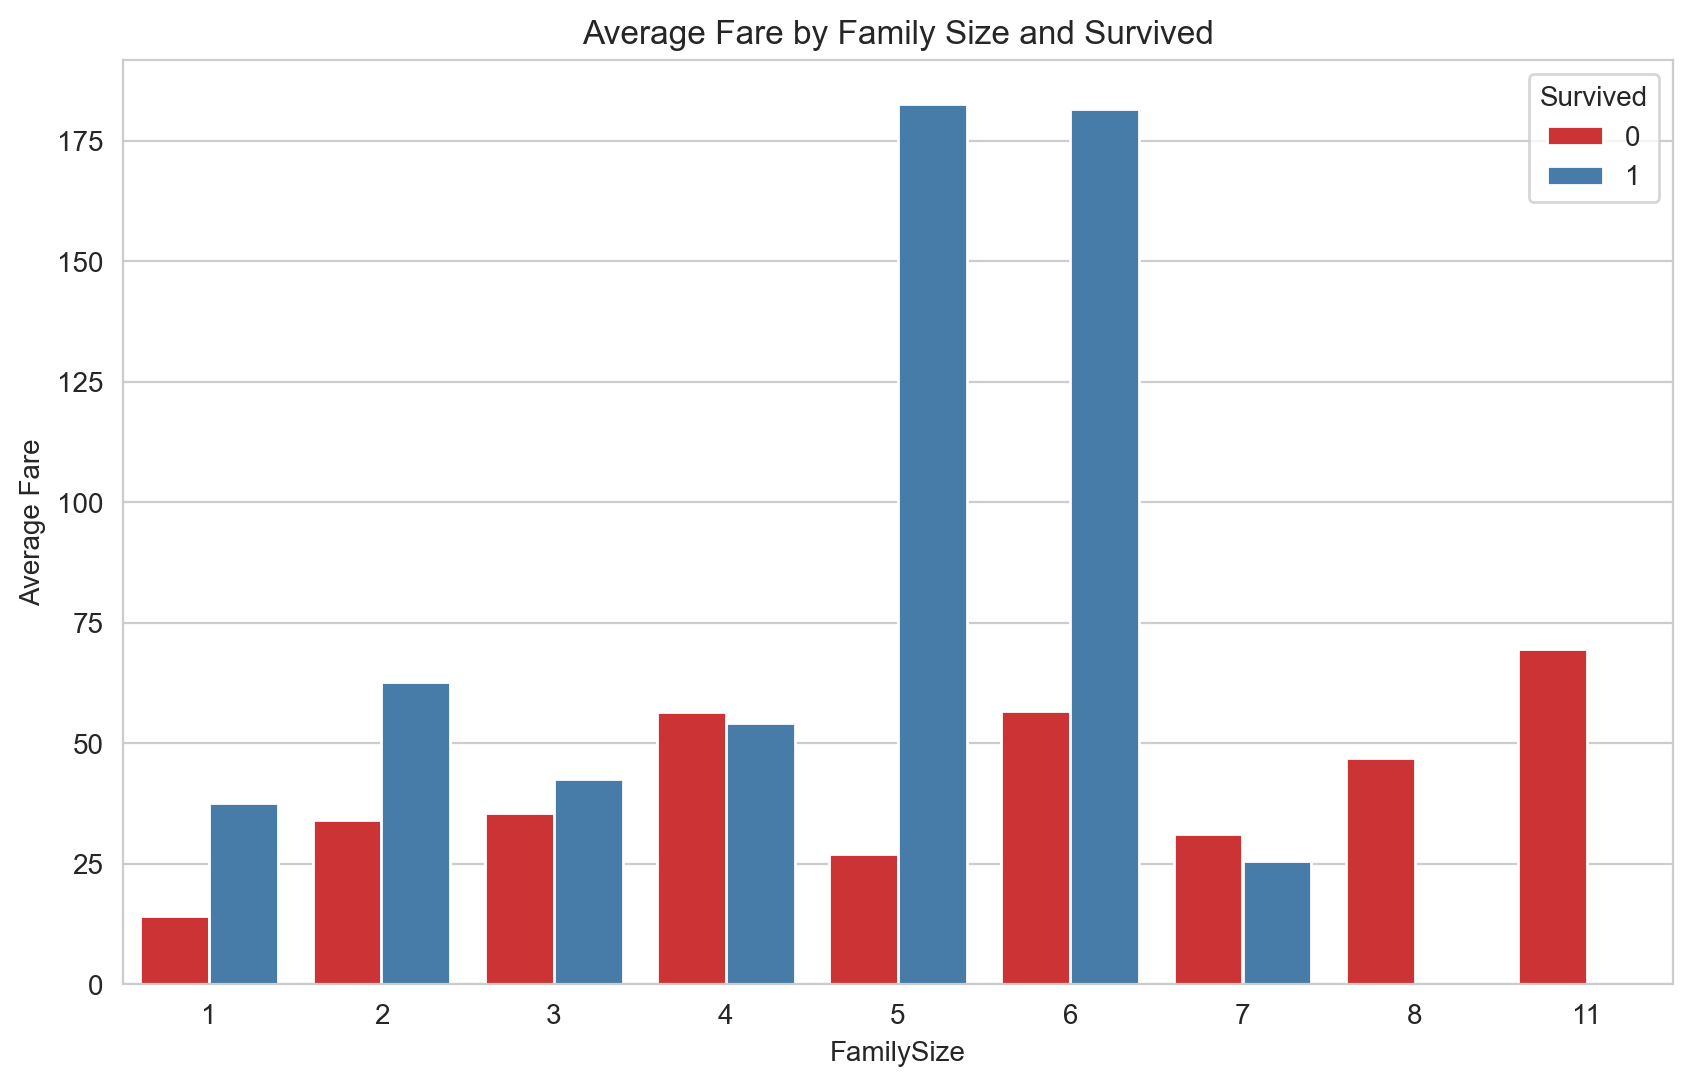

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
# Use the 'grouped7' DataFrame as the data source
# 'FamilySize' is plotted on the x-axis, 'Fare' on the y-axis, and 'Survived' is represented by the hue
# Set the color palette to "Set1"
sns.barplot(data=grouped7, x="FamilySize", y="Fare", hue="Survived", palette="Set1")

# Set the title of the plot
plt.title("Average Fare by Family Size and Survived")

# Set the x-axis label
plt.xlabel("FamilySize")

# Set the y-axis label
plt.ylabel("Average Fare")

# Display the plot
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7188\3111889594.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



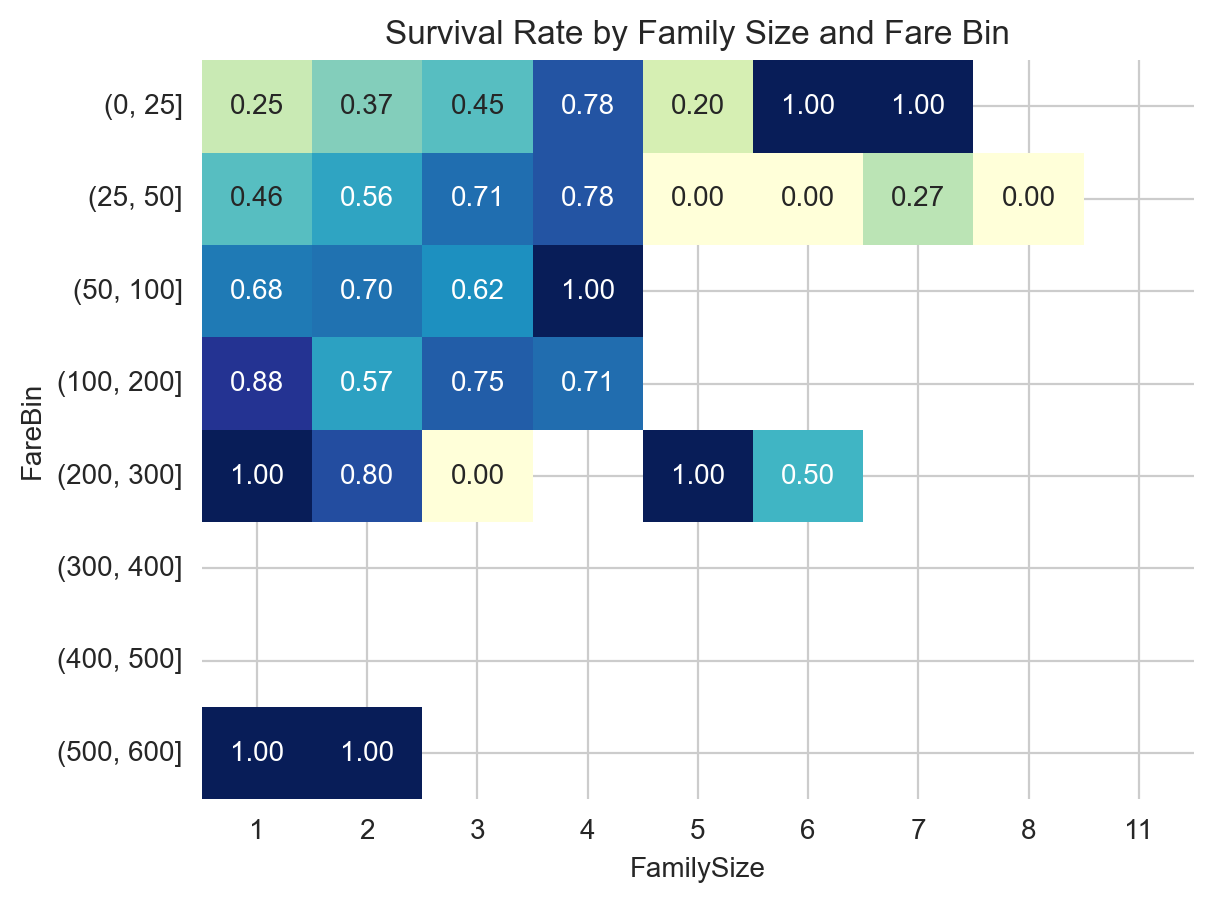

In [ ]:
# Calculate family size by summing SibSp and Parch and adding 1 for the passenger
df_Titanic['FamilySize'] = df_Titanic['SibSp'] + df_Titanic['Parch'] + 1

# Group the data by family size and calculate the survival rate
grouped = df_Titanic.groupby('FamilySize')['Survived'].mean().reset_index()
grouped

# Create fare bins for categorizing fares
fare_bins = [0, 25, 50, 100, 200, 300, 400, 500, 600]

# Create a new column 'FareBin' by binning the Fare values
df_Titanic['FareBin'] = pd.cut(df_Titanic_drop_null['Fare'], bins=fare_bins)
df_Titanic.head()

# Group the data by family size and fare bin and calculate the survival rate
groupby_family = df_Titanic.groupby(["FamilySize", "FareBin"]).agg({"Survived":"mean"}).reset_index()
groupby_family.head(10)

# Set the style of the plot
sns.set_style("whitegrid")

# Plot a heatmap using seaborn
# Use the 'groupby_family' DataFrame as the data source
# 'FareBin' is represented on the y-axis, 'FamilySize' on the x-axis, and 'Survived' is represented by the color intensity
# Use the 'YlGnBu' colormap, display the survival rates as annotations, and hide the color bar
sns.heatmap(groupby_family.pivot(index='FareBin', columns='FamilySize', values='Survived'), cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title("Survival Rate by Family Size and Fare Bin")
plt.xlabel("FamilySize")
plt.ylabel("FareBin")

# Show the plot
plt.show()
